## A notebook to analyze the capillary waves

In [40]:
import numpy as np
import os
from defs import Case, Interface2D
from matplotlib import pyplot as plt
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/pof.mplstyle')

In [8]:
N = 512; L = 2*np.pi; kp = 4; omegap = (1*kp)**0.5; 
Bo = 12.5; lc = 2*np.pi/Bo**0.5/kp; # Bond number decides the capillary length scale

filepath='/projects/DEIKE/jiarongw/turbulence/capillary/curved_fixREtau_boundary_REtau720_BO12.5_g1_ak0.2_MU16_LEVEL10_emax0.3/'
t = 48
interface = Interface2D(L0 = L, N = N, path = filepath, 
                        pre='eta/eta_loc_t', t = t, PRUNING=True, pruningz=1+0.4/4)

/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence/defs.py:159: FutureWarning: read_table is deprecated, use read_csv instead.
  snapshot = pd.read_table(filename, delimiter = ',')


Pruning points above 1.1!


In [12]:
# from prepare import read_p, read_fields

from prepare import load_object, save_object

def read_fields_t (t, working_dir):

    ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
    uy_3D = {'name':'uy', 'value':[]}
    f_3D = {'name':'f', 'value':[]}

    NSLICE = 256    
    NGRID = 512
    # Read in the fields either from pickle or from slice data
    for field in (ux_3D,uy_3D,f_3D):         
        """NOTICE: to accomodate different pickle versions"""
        picklename = working_dir + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % t +'.pkl'
    #             picklename = working_dir + 'field/' + 'pickle_desktop/' + field['name']+'_t%g' % t +'.pkl'
        exists = os.path.exists(picklename)
        # If the pickle is there read in the pickles
        if exists:
            field['value'] = load_object(picklename)
            print('pickle restored!')
        # If no pickle read in from the slice files and pickle dump
        if not exists:
            for sn in range (0, NSLICE-1):
                filename = working_dir + 'field/'+field['name']+'_t%g_slice%g' % (t,sn)
                snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
                snapshot.reshape([NGRID,NGRID+1])
                field['value'].append(snapshot[:,0:NGRID].astype(np.float))
            field['value'] = np.array(field['value'])
            save_object(field['value'], picklename)

    # Compute Reynolds stress (not shifted)
    ux_mean = np.tile(np.average(ux_3D['value'], axis=(0,1)), (ux_3D['value'].shape[1], 1)) 
    uy_mean = np.tile(np.average(uy_3D['value'], axis=(0,1)), (uy_3D['value'].shape[1], 1))
    re_stress_3D = (ux_3D['value']-ux_mean)*(uy_3D['value']-uy_mean)*(1-f_3D['value'])
    # Compute wave coherent stress (TODO!)
    
    return (ux_3D['value'], uy_3D['value'], f_3D['value'], re_stress_3D)

In [14]:
ux_3D, uy_3D, f_3D, re_stress_3D = read_fields_t(t=48, working_dir=filepath)

Text(0.5, 1.05, '$u_y/u_{*}$')

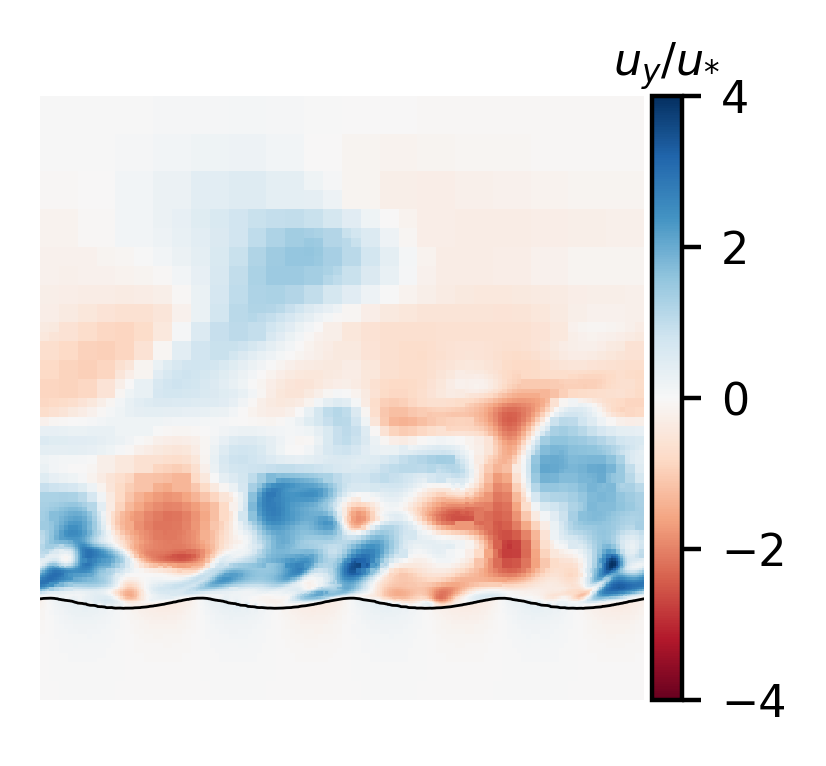

In [30]:
fig = plt.figure(figsize=[2.5,2])
img = plt.imshow(np.rot90(uy_3D[20,:,:])/0.25, cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = 4, vmin = -4)
NGRID = 512; NSLICE = 256; L0 = 2*np.pi
xarray = np.linspace(-L0/2.,L0/2.,NGRID,endpoint=False)+L0/2**NGRID/2
plt.plot(xarray, interface.eta[20], c='k', lw=0.5)
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
plt.axis('off')
cbar.ax.text(0.5, 1.05, r'$u_y/u_{*}$', ha='center', va='center', transform=cbar.ax.transAxes)

Text(0, 0.5, '$\\eta$')

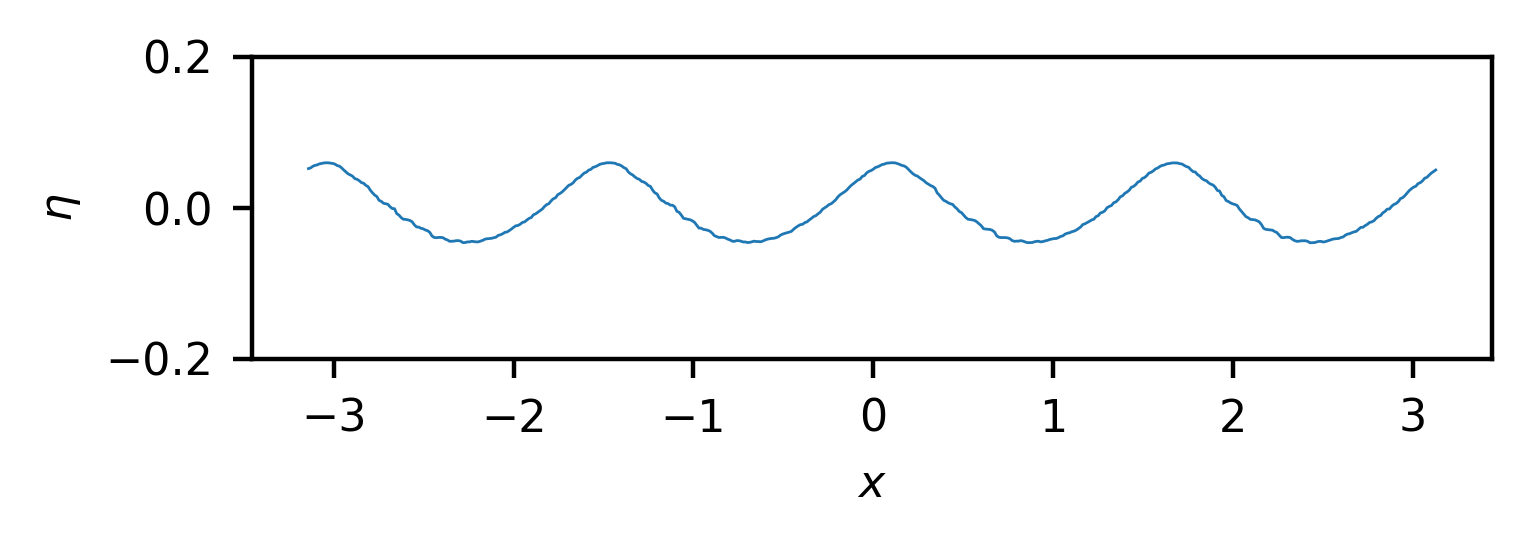

In [39]:
plt.figure (figsize=[4,1])
plt.plot(xarray, np.average(interface.eta[:,:], axis=0)-1, lw=0.5)
plt.ylim([-0.2,0.2])
plt.xlabel('$x$'); plt.ylabel(r'$\eta$')

In [44]:
N = 512; L = 2*np.pi; kp = 4; omegap = (1*kp)**0.5; 
Bo = 12.5; lc = 2*np.pi/Bo**0.5/kp; # Bond number decides the capillary length scale

filepath='/projects/DEIKE/jiarongw/turbulence/capillary/curved_fixREtau_boundary_REtau720_BO12.5_g1_ak0.2_MU16_LEVEL10_emax0.3_nowind/'
t = 0
# interface = Interface2D(L0 = L, N = N, path = filepath, 
#                         pre='eta/eta_loc_t', t = t, PRUNING=True, pruningz=1+0.4/4)
ux_3D, uy_3D, f_3D, re_stress_3D = read_fields_t(t=0, working_dir=filepath)

Text(0.5, 1.05, '$u_y/u_{*}$')

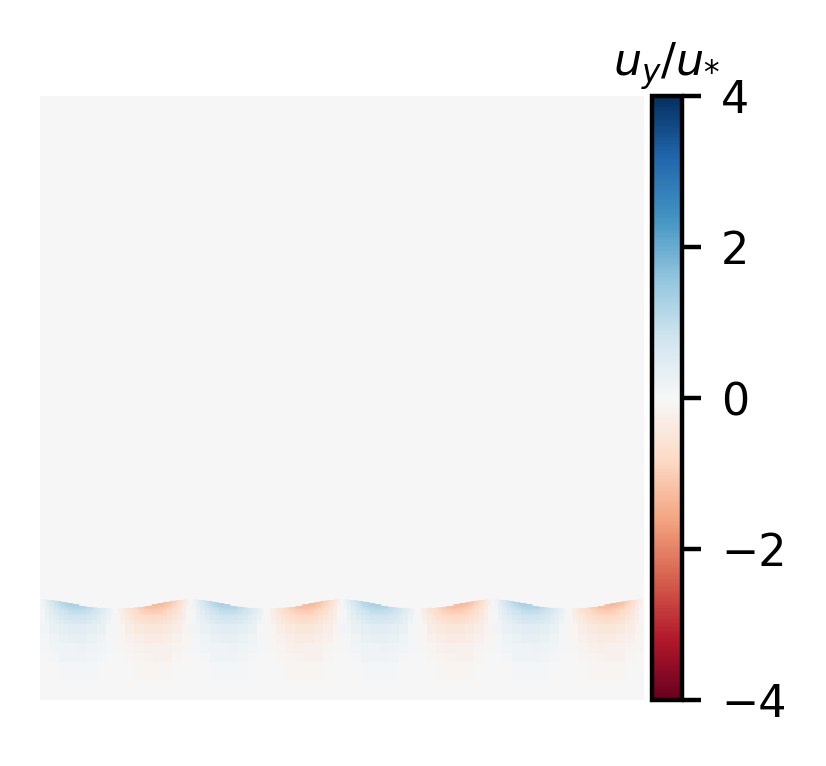

In [47]:
fig = plt.figure(figsize=[2.5,2])
c = (16/4)**0.5
img = plt.imshow(np.rot90(uy_3D[20,:,:])/c, cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi],
                 vmax = 4, vmin = -4)
NGRID = 512; NSLICE = 256; L0 = 2*np.pi
xarray = np.linspace(-L0/2.,L0/2.,NGRID,endpoint=False)+L0/2**NGRID/2
# plt.plot(xarray, interface.eta[20], c='k', lw=0.5)
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
plt.axis('off')
cbar.ax.text(0.5, 1.05, r'$u_y/u_{*}$', ha='center', va='center', transform=cbar.ax.transAxes)